# Installation:
[JAX](https://github.com/google/jax)

#Lets play with JAX

In [27]:
# JAX's syntax is (for the most part) same as NumPy's!
# There is also a SciPy API support (jax.scipy)
import jax.numpy as jnp
import numpy as np

# Special transform functions (we'll understand what these are very soon!)
from jax import grad, jit, vmap, pmap

# JAX's low level API 
# (lax is just an anagram for XLA, not completely sure how they came up with name JAX)
from jax import lax

from jax import make_jaxpr
from jax import random
from jax import device_put
import matplotlib.pyplot as plt

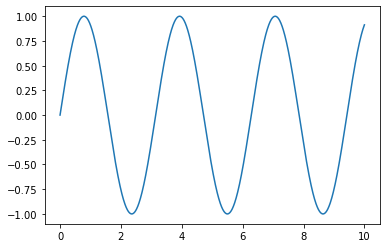

In [28]:
# Fact 1: JAX's syntax is remarkably similar to NumPy's 
x_np = np.linspace(0, 10, 1000)
y_np = 2 * np.sin(x_np) * np.cos(x_np)
plt.plot(x_np, y_np)

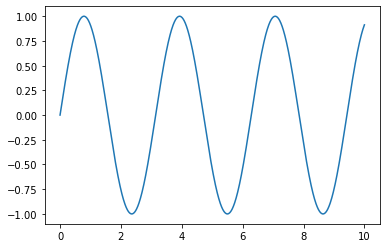

In [29]:
#JAX's syntax
x_jnp = jnp.linspace(0, 10, 1000)
y_jnp = 2 * jnp.sin(x_jnp) * jnp.cos(x_jnp)
plt.plot(x_jnp, y_jnp)

In [30]:
type(np.linspace(0, 10, 1000))

numpy.ndarray

In [31]:
type(jnp.linspace(0, 10, 1000))

jaxlib.xla_extension.DeviceArray

In [32]:
# Fact 2: JAX arrays are immutable! (embrace the functional programming paradigm <3)

size = 10
index = 0
value = 23

# In NumPy arrays are mutable
x = np.arange(size)
print(x)
x[index] = value
print(x)

[0 1 2 3 4 5 6 7 8 9]
[23  1  2  3  4  5  6  7  8  9]


In [33]:
# In JAX we have to deal with immutable arrays
x = jnp.arange(size)
print(x)
x[index] = value
print(x)

[0 1 2 3 4 5 6 7 8 9]


TypeError: ignored

In [34]:
# Solution/workaround: Creating a additional object in memory
y = x.at[index].set(value)
print(x)
print(y)


[0 1 2 3 4 5 6 7 8 9]
[23  1  2  3  4  5  6  7  8  9]


In [37]:
# Fact 3: JAX handles random numbers differently (for a good reason! we'll see later why)
seed = 0
key = random.PRNGKey(seed)

x = random.normal(key, (10, ))  # you need to explicitly pass the key i.e. PRNG state
print(type(x), x)  # notice the DeviceArray type - that leads us to the next cell!

<class 'jaxlib.xla_extension.DeviceArray'> [-0.3721109   0.26423115 -0.18252768 -0.7368197  -0.44030377 -0.1521442
 -0.67135346 -0.5908641   0.73168886  0.5673026 ]


In [42]:
key

DeviceArray([0, 0], dtype=uint32)